In [191]:
#--------------------------------------------------------------------------------
#--                                                                            --
#--               Federal University of Santa Catarina UFSC                    --
#--                                Brazil                                      --
#--                                                                            --
#--------------------------------------------------------------------------------
#--                                                                            --
#-- File        : Atividade_5.py                                               --
#-- Authors     : Luis Felipe de Deus
#--             : Guilberth Matos 
#--             : Jéferson Cansi Pedroso                                       --
#--                                                                            -- 
#--------------------------------------------------------------------------------
#--                                                                            --
#-- Created     : 16 July 2021                                                  --
#-- Update      : 16 July 2021                                                  --
#--------------------------------------------------------------------------------

## Import the libs which we need

In [146]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd
import os
import shutil
plt.style.use('seaborn')
import pyeeg 
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

## Read data

In [70]:
#This is the root folder
dataset_folder = 'Data/EEG_Dataset/'

In [158]:
#Store all the filenames of the signals
data = []
#For each subset folder...
for e,f in enumerate(os.listdir(dataset_folder)):
    dir_aux = dataset_folder+f
    data_filenames = []
    #For each txt file into the folder...
    for s in os.listdir(dir_aux):
        data_filenames.append(dir_aux+'/'+s)
        
    #Add to dataset
    data.append(sorted(data_filenames))
        

## Feature extractor class

In [161]:
'''
@brief: This class implements a feature extractor, the main goal is to extract a small number of features from a time-series
this time series is usually a biomedical signal. e.g. EEG, ECG
@param: data -> array or list with the signal
@args** associated with the features references

'''
class feature_extractor:
    def __init__(self, data, kmax=10, tau=1, dE=3, sps=None):
        self.signal = data
        self.features = []
        #self.support_fts = {'DFA':None, 'Hig_FD':None, 'SVD_Ent':None, 'Fisher_inf':None, 'Pet_FD':None}
        self.kmax = kmax
        self.tau = tau
        self.dE = dE
        self.sps = sps
        
    def get_features(self):        
        return np.asarray(self.features)
    
    def run(self):
        
        # Detrended Fluctuation Analysis (DFA);
        DFA = pyeeg.dfa(self.signal)
        self.features.append(DFA)

        # Higucchi Fractal Dimension (HFD);
        higFD = pyeeg.hfd(self.signal, self.kmax)
        self.features.append(higFD)

        # Single Value Decomposition (SVD) Entropy
        SVD_en = pyeeg.svd_entropy(self.signal, self.tau, self.dE)
        self.features.append(SVD_en)

        # Fisher Information
        Fi = pyeeg.fisher_info(self.signal, self.tau, self.dE)
        self.features.append(Fi)

        # Petrosian Fractal Dimension (PFD)
        petFD = pyeeg.pfd(self.signal)
        self.features.append(petFD)


## Experiment

In [169]:

support_fts = ['DFA', 'Hig_FD', 'SVD_Ent', 'Fisher_inf', 'Pet_FD']
final_features_df = pd.DataFrame()
for samples in data:
    aux_sample = samples[0].split('/')[-1]
    aux_sample = aux_sample.split('.')[0][0]
    aux_subset = samples[0].split('/')[-2]
    aux_subset = aux_subset.replace('set','')
    print("Running experiment for subset %s - class %s of signals"%(aux_subset, aux_sample))
    
    features_subset = []
    for filename in samples:
        #Load EEG signal
        EEG_raw = np.loadtxt(filename)
        
        #Create Feature Extractor object
        fe = feature_extractor(EEG_raw)
        #Run analysis
        fe.run()
        #Get current features
        aux = fe.get_features()
        #Store feature from this subset
        features_subset.append(aux)
        
    #Create dataframe with features from this subset
    df_aux = pd.DataFrame(np.asarray(features_subset), columns = support_fts)
    #Create ID - Each subset has a letter at the beggining of the filename, use this letter as ID
    signal_ID = [aux_sample]*df_aux.shape[0]
    df_aux['ID'] = signal_ID
    
    #Store all features - concat
    final_features_df = pd.concat([final_features_df, df_aux], axis=0)
    
#Reset index
final_features_df = final_features_df.reset_index()
final_features_df = final_features_df.drop(['index'],axis=1)

Running experiment for subset B - class O of signals


/anaconda/envs/py35/lib/python3.5/site-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/anaconda/envs/py35/lib/python3.5/site-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/anaconda/envs/py35/lib/python3.5/site-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where

Running experiment for subset A - class Z of signals
Running experiment for subset C - class N of signals
Running experiment for subset D - class F of signals
Running experiment for subset E - class S of signals


In [157]:
final_features_df

,DFA,Hig_FD,SVD_Ent,Fisher_inf,Pet_FD,ID
0,0.887621,0.783744,0.875873,0.881293,0.798116,O
1,0.364243,0.350003,0.353285,0.341663,0.333751,O
2,0.670800,0.661433,0.649778,0.655715,0.677949,O
3,0.670800,0.661433,0.649778,0.655715,0.677949,O
4,0.581396,0.588340,0.589802,0.592911,0.595338,O
5,0.814505,0.756747,0.831189,0.766903,0.911118,Z
6,0.376406,0.421086,0.387810,0.533363,0.426055,Z
7,0.662080,0.601189,0.658598,0.819599,0.687227,Z
8,0.662080,0.601189,0.658598,0.819599,0.687227,Z
9,0.586510,0.582345,0.588242,0.568653,0.576495,Z


In [190]:
### Store features
final_features_df.to_csv('DATA_FRAME_FEATURES.csv')

## Plot Features in time

<IPython.core.display.Javascript object>


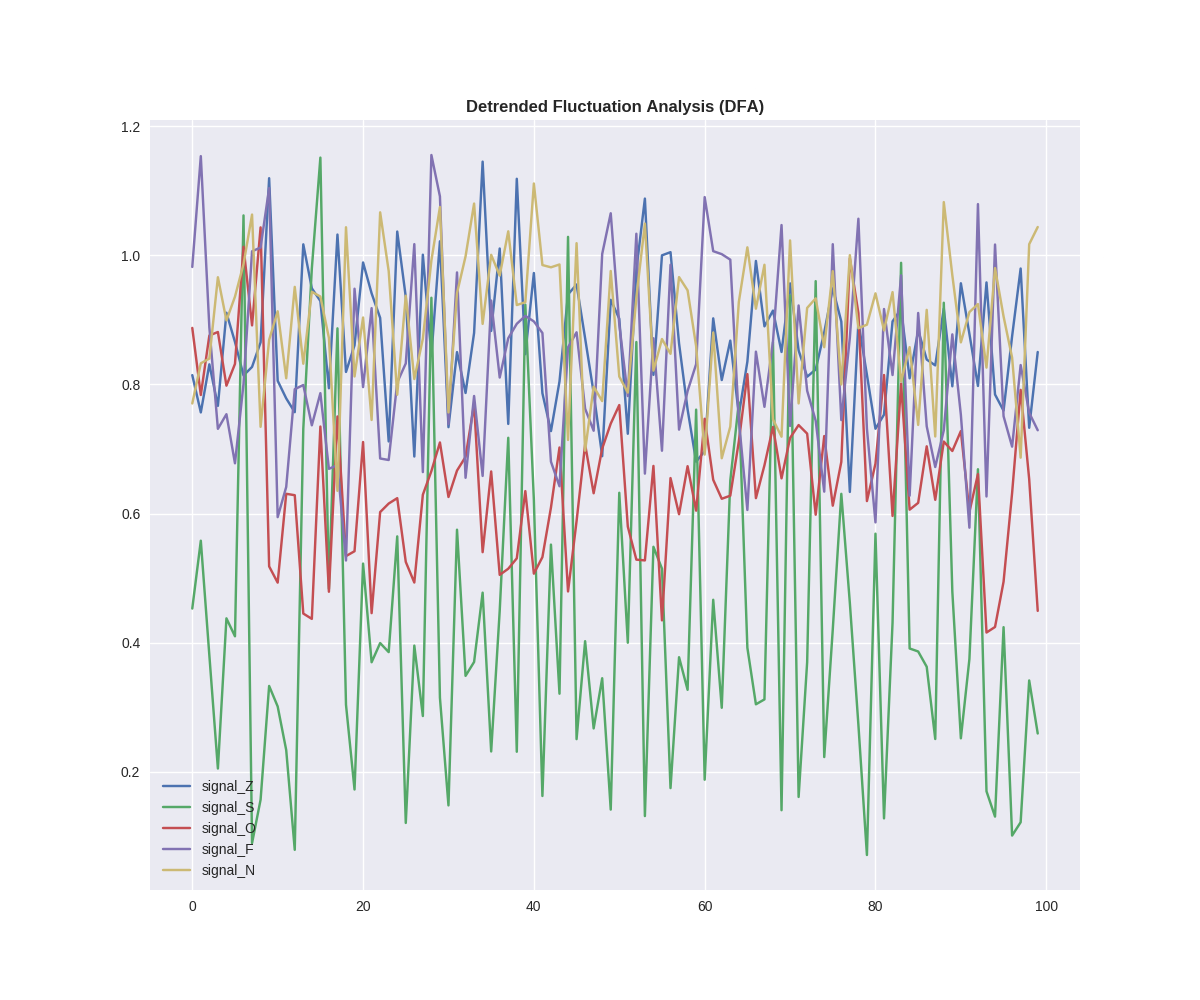

In [185]:
#Plot features
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
for idx in final_features_df['ID'].value_counts().index:
    df_aux = final_features_df[final_features_df['ID']==idx]
    plt.plot(np.asarray(df_aux['DFA']), label=('signal_'+idx))
    plt.legend()
    plt.title("Detrended Fluctuation Analysis (DFA)",fontsize = 'large',fontweight = 'bold')
    plt.show()

<IPython.core.display.Javascript object>


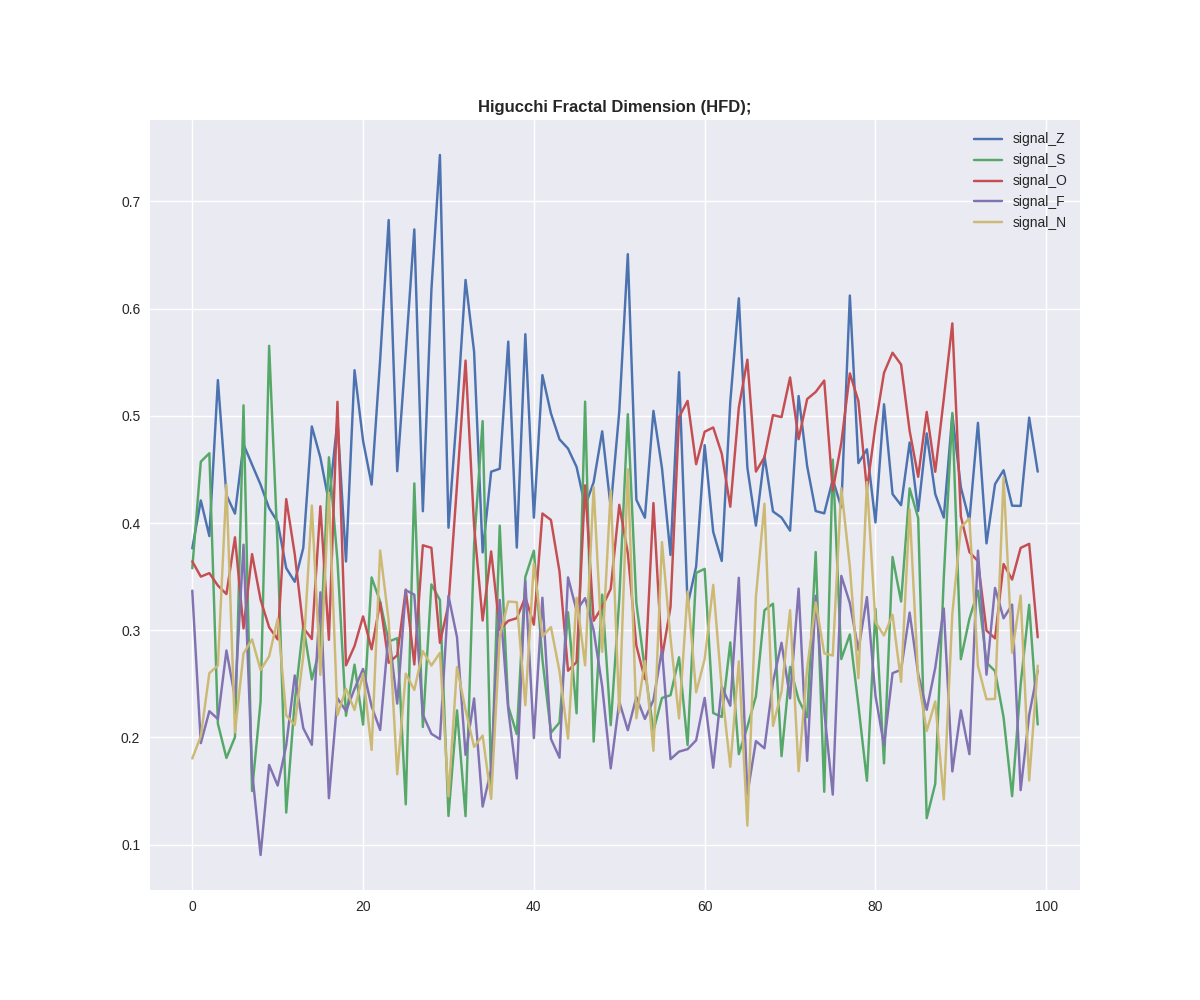

In [186]:
#Plot features
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
for idx in final_features_df['ID'].value_counts().index:
    df_aux = final_features_df[final_features_df['ID']==idx]
    plt.plot(np.asarray(df_aux['Hig_FD']), label=('signal_'+idx))
    plt.legend()
    plt.title("Higucchi Fractal Dimension (HFD);",fontsize = 'large',fontweight = 'bold')
    plt.show()

<IPython.core.display.Javascript object>


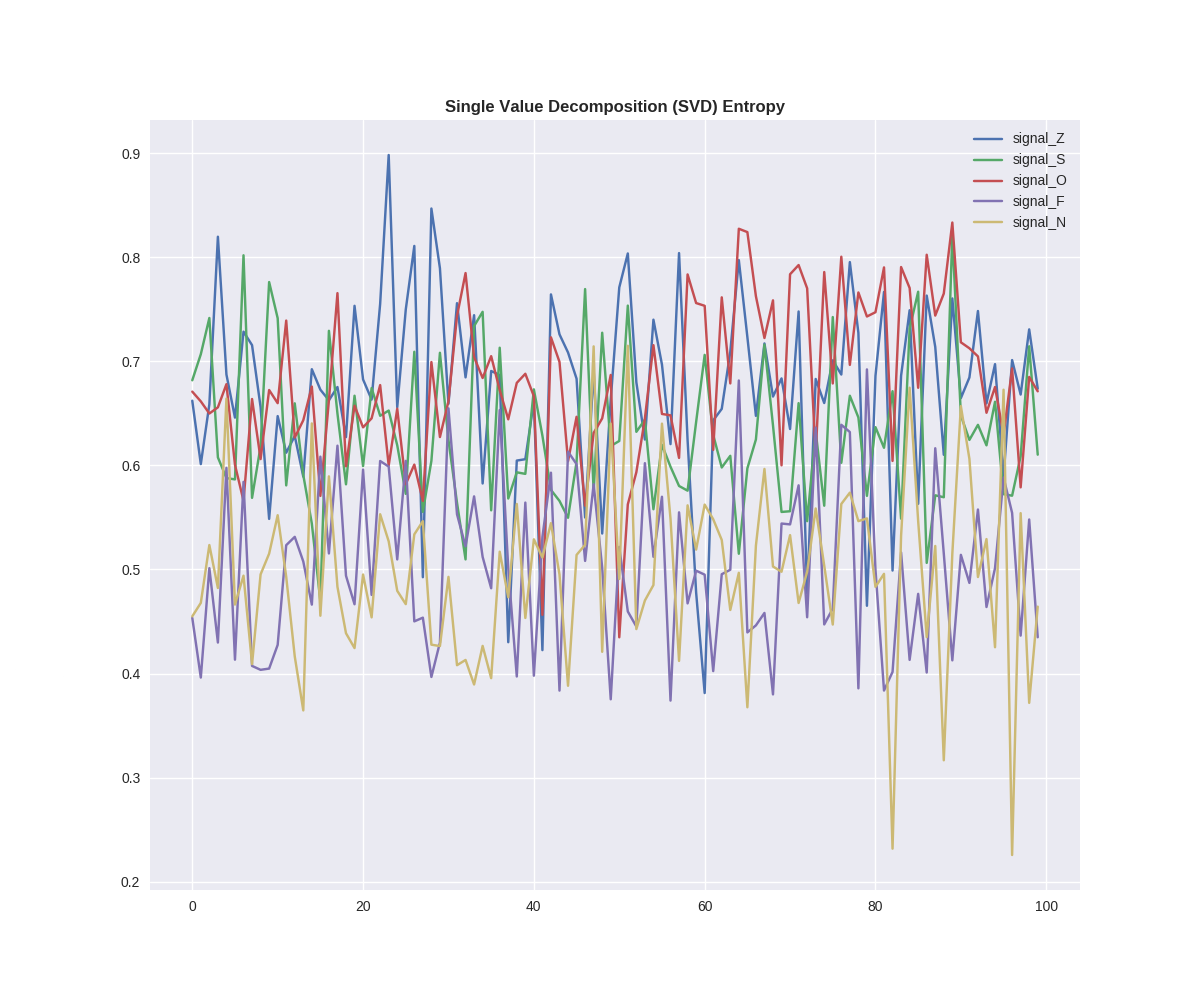

In [187]:
#Plot features
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
for idx in final_features_df['ID'].value_counts().index:
    df_aux = final_features_df[final_features_df['ID']==idx]
    plt.plot(np.asarray(df_aux['SVD_Ent']), label=('signal_'+idx))
    plt.legend()
    plt.title("Single Value Decomposition (SVD) Entropy",fontsize = 'large',fontweight = 'bold')
    plt.show()

<IPython.core.display.Javascript object>


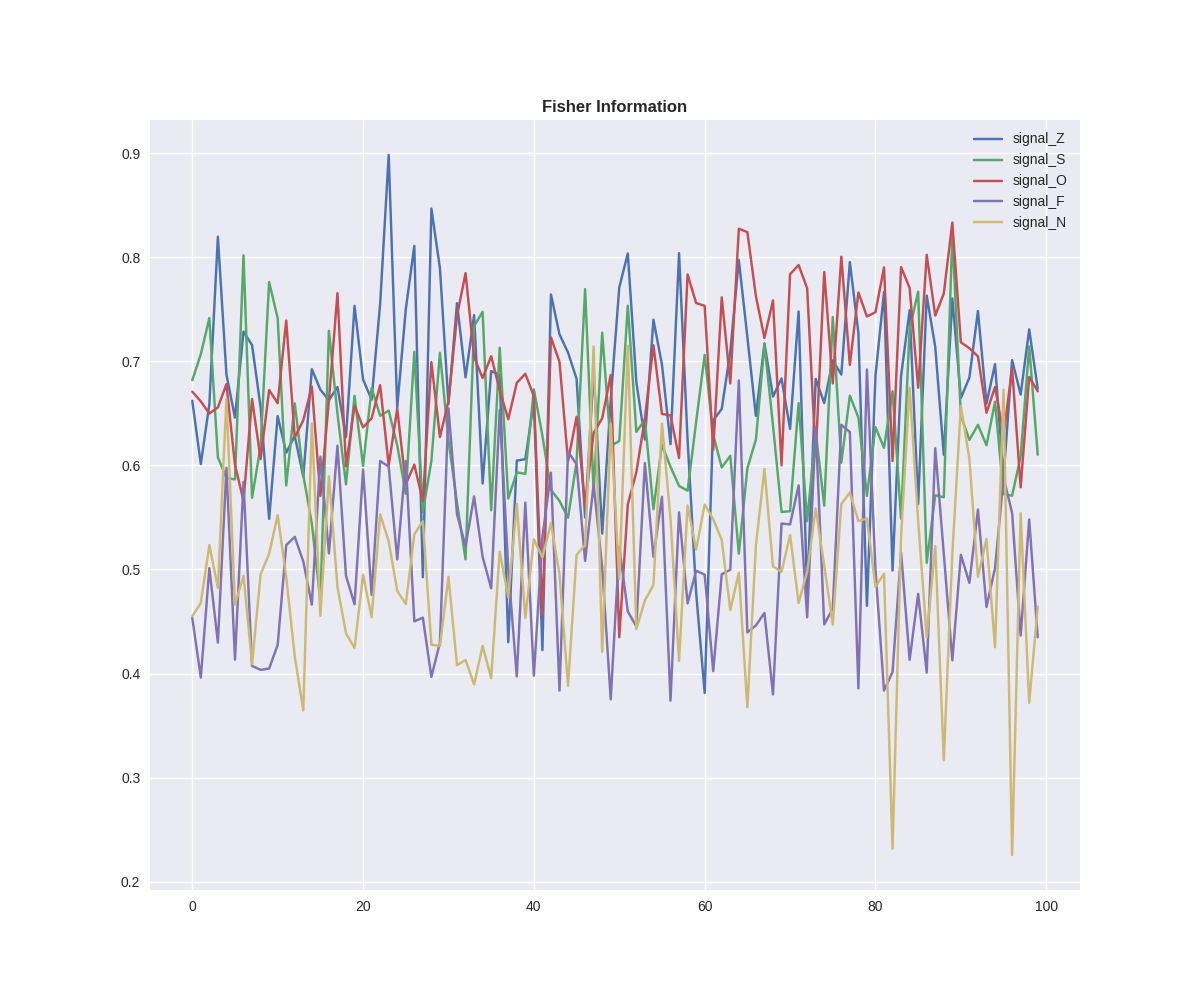

In [188]:
#Plot features
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
for idx in final_features_df['ID'].value_counts().index:
    df_aux = final_features_df[final_features_df['ID']==idx]
    plt.plot(np.asarray(df_aux['Fisher_inf']), label=('signal_'+idx))
    plt.legend()
    plt.title("Fisher Information",fontsize = 'large',fontweight = 'bold')
    plt.show()

<IPython.core.display.Javascript object>


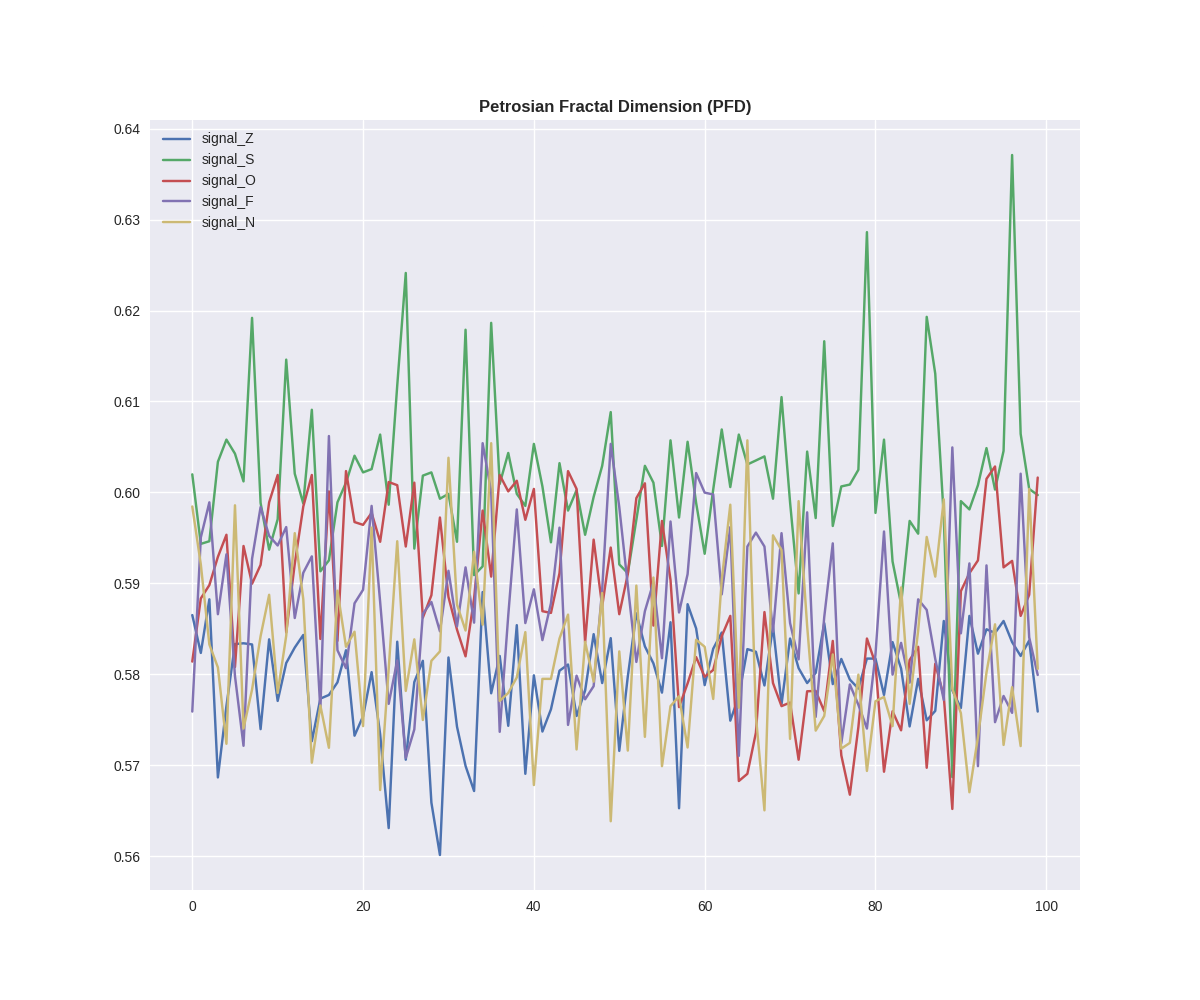

In [189]:
#Plot features
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
for idx in final_features_df['ID'].value_counts().index:
    df_aux = final_features_df[final_features_df['ID']==idx]
    plt.plot(np.asarray(df_aux['Pet_FD']), label=('signal_'+idx))
    plt.legend()
    plt.title("Petrosian Fractal Dimension (PFD)",fontsize = 'large',fontweight = 'bold')
    plt.show()